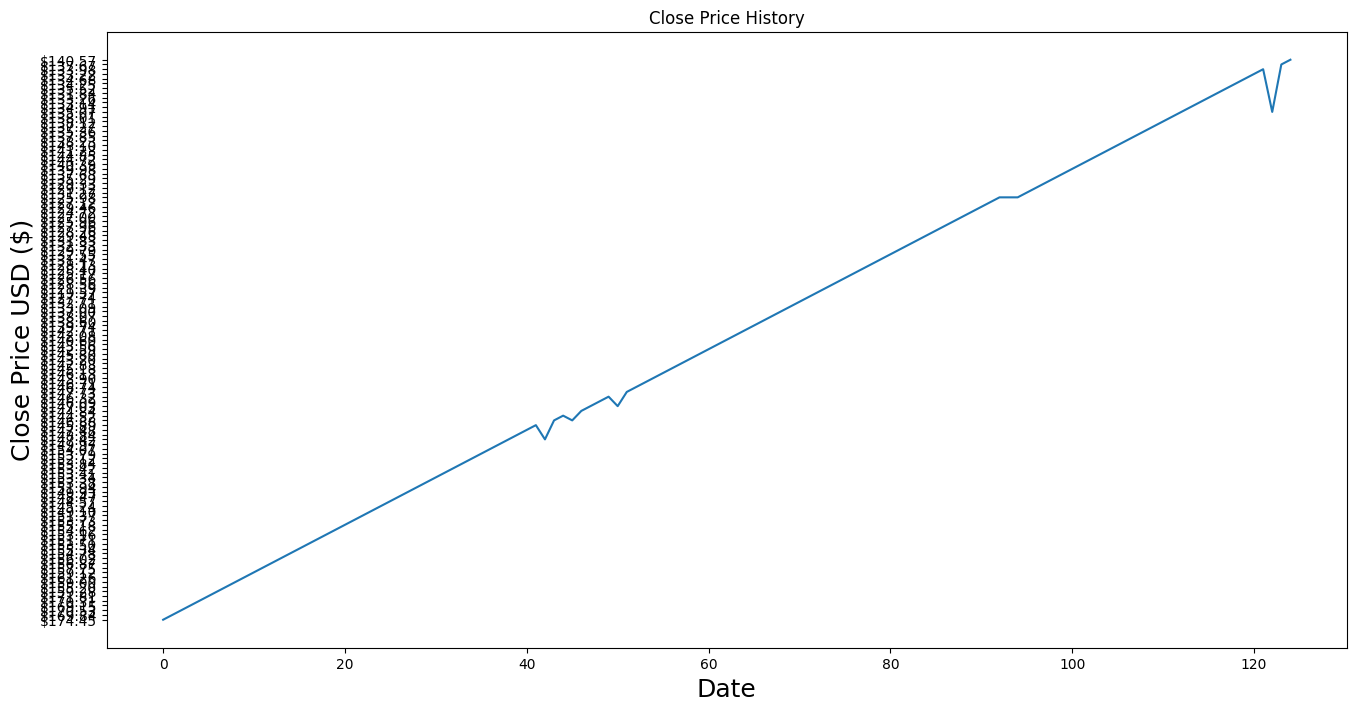

ValueError: could not convert string to float: '$174.45'

In [6]:
def predict_stock_price():
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import MinMaxScaler
    from keras.models import Sequential
    from keras.layers import LSTM
    from keras.layers import Dense
    
    # Load the data
    df = pd.read_csv('Amazon_historical.csv')
    # Show the data
    df.head()
    # Get the number of trading days
    df.shape
    # Visualize the data
    plt.figure(figsize=(16,8))
    plt.title('Close Price History')
    plt.plot(df['Close'])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.show()
    # Create a new dataframe with only the 'Close column
    data = df.filter(['Close'])
    # Convert the dataframe to a numpy array
    dataset = data.values
    # Get the number of rows to train the model on
    training_data_len = int(np.ceil( len(dataset) * .95 ))
    training_data_len
    # Scale the data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)
    scaled_data
    # Create the training data set
    # Create the scaled training data set
    train_data = scaled_data[0:int(training_data_len), :]
    # Split the data into x_train and y_train data sets
    x_train = []
    y_train = []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
    # Convert the x_train and y_train to numpy arrays
    x_train, y_train = np.array(x_train), np.array(y_train)
    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    # Train the model
    model.fit(x_train, y_train, batch_size=1, epochs=1)
    # Create the testing data set
    # Create a new array containing scaled values from index 1543 to 2003
    test_data = scaled_data[training_data_len - 60: , :]
    # Create the data sets x_test and y_test
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
    # Convert the data to a numpy array
    x_test = np.array(x_test)
    # Reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    # Get the models predicted price values
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(predictions - y_test)**2)
    rmse
    # Plot the data
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions
    # Visualize the data
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()
    # Show the valid and predicted prices
    valid
    # Get the quote
    apple_quote = pd.read_csv('AAPL.csv')
    new_df = apple_quote.filter(['Close'])
    # Get the last 60 day closing price values and convert the dataframe to an array
    last_60_days = new_df[-60:].values
    # Scale the data to be values between 0 and 1
    last_60_days_scaled = scaler.transform(last_60_days)
    # Create an empty list
    X_test = []
    # Append the past 60 days
    X_test.append(last_60_days_scaled)
    # Convert the X_test data set to a numpy array
    X_test = np.array(X_test)
    # Reshape the data
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    # Get the predicted scaled price
    pred_price = model.predict(X_test)
    # Undo the scaling
    pred_price = scaler.inverse_transform(pred_price)
    print(pred_price)
    return pred_price

predict_stock()